Visualización de la información

**Dante Bermúdez Marbán**

In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sbn

In [74]:
datos = pd.read_csv("paralelismo.csv")
datos

,Proc,Time
0,1,29278
1,16,178
2,25,78
3,64,16
4,256,2
5,400,1


1. *Encontrar el valor atípico y explicar por qué se considera un valor extraño.*

Una manera de detectar valores atípicos, es haciendo uso de una gráfica de caja, la cual, entre sus varios elementos que muestra como los cuartiles, muestra los posibles puntos atípicos basándose en el rango intercuantil **IQR** que se calcula como $Q_3 - Q_1$. Los bigotes del diagrama de caja son de $1.5$IQR. Todo lo que no esté en ese rango, es un candidato a dato atípico

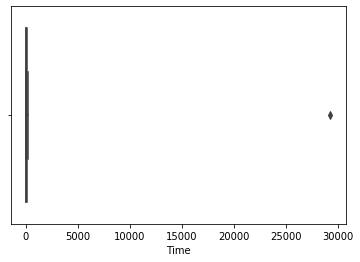

In [76]:
sbn.boxplot(datos.Time)

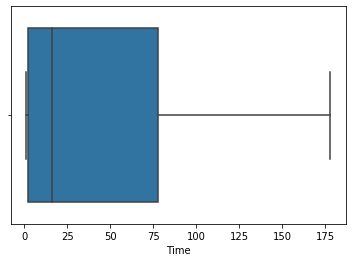

In [77]:
# Quitando el primer punto atípico
sbn.boxplot(datos.Time[1:])

2. *Crear un archivo CSV y cargar los datos en un DataFrame de Pandas*

Ya quedó xd

3. *Completar las columnas de Speeup, Efficiency y Cost usando las fórmulas mostradas en la diapositiva 6, tanto para el caso absoluto como para el caso relativo con p' = 16. Realizar los gráficos correspondientes usando Matplotlib.*

-------
**Caso absoluto**
* Speed up: $S_p = \dfrac{t_1}{t_p}$
* Eficiencia: $e_a = \dfrac{s_p}{p}$
* Costo: $c_p = p \cdot t_p$

In [20]:
datos["Aceleración"] = datos["Time"][0] / datos["Time"]

datos["Eficiencia"] = datos["Aceleración"] / datos["Proc"]

datos["Costo"] = datos["Proc"] * datos["Time"]

datos

,Proc,Time,Aceleración,Eficiencia,Costo
0,1,29278,1.000000,1.000000,29278
1,16,178,164.483146,10.280197,2848
2,25,78,375.358974,15.014359,1950
3,64,16,1829.875000,28.591797,1024
4,256,2,14639.000000,57.183594,512
5,400,1,29278.000000,73.195000,400


In [53]:
def graficar(x,y,ejex,ejey,plot_lineal=False):
    if plot_lineal:
        lineal = np.arange(0,np.max(x))
        plt.plot(lineal,lineal, label = "Teorico")
    
    plt.plot(x,y,label="Real",marker='o')
    plt.grid(True)
    plt.legend()
    plt.xlabel(ejex)
    plt.ylabel(ejey)
    plt.show()

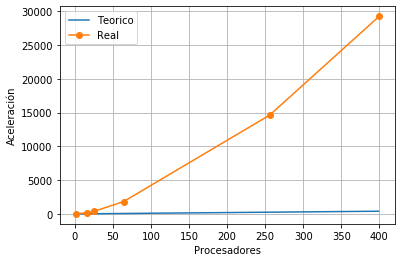

In [54]:
graficar(datos.Proc, datos.Aceleración,"Procesadores","Aceleración",True)

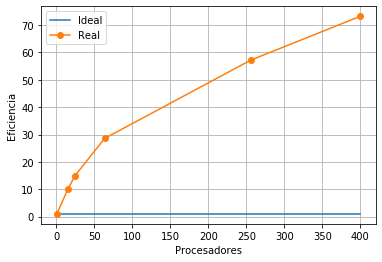

In [55]:
plt.plot([0,np.max(datos.Proc)],[1,1],label="Ideal")
graficar(datos.Proc, datos.Eficiencia,"Procesadores","Eficiencia")

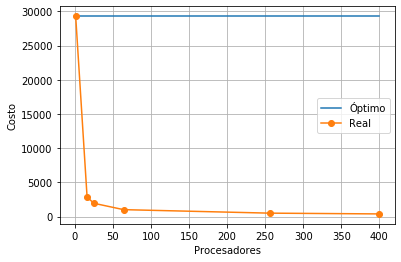

In [56]:
plt.plot([0,np.max(datos2.Proc)],[datos.Time[0],datos.Time[0]], label="Óptimo")
graficar(datos.Proc, datos.Costo,"Procesadores","Costo")

----
**Caso relativo con $p' = 16$**
* Speed up relativo: $S_{p'} = \dfrac{t_{p'}}{t_p}$
* Eficiencia relativa: $e_a = \dfrac{S_{p'}}{p}p'$
* Máxima aceleración relativa: $\textrm{max}(S_{p'}) = \dfrac{p}{p'}$

In [25]:
datos_relativos = datos.loc[1:,["Proc","Time"]]
datos_relativos

,Proc,Time
1,16,178
2,25,78
3,64,16
4,256,2
5,400,1


In [26]:
datos_relativos["Aceleración"] = datos_relativos["Time"].iloc[0] / datos_relativos["Time"]

datos_relativos["Max(Aceleración)"] = datos_relativos["Proc"] / datos_relativos["Proc"].iloc[0]

datos_relativos["Eficiencia"] = datos_relativos["Aceleración"] / datos_relativos["Proc"]


datos_relativos

,Proc,Time,Aceleración,Max(Aceleración),Eficiencia
1,16,178,1.000000,1.0000,0.062500
2,25,78,2.282051,1.5625,0.091282
3,64,16,11.125000,4.0000,0.173828
4,256,2,89.000000,16.0000,0.347656
5,400,1,178.000000,25.0000,0.445000


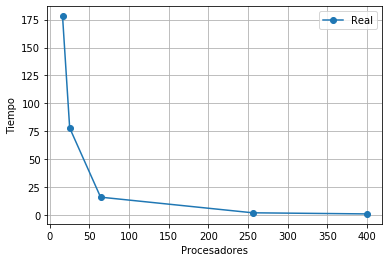

In [58]:
graficar(datos_relativos.Proc, datos_relativos.Time, "Procesadores","Tiempo")

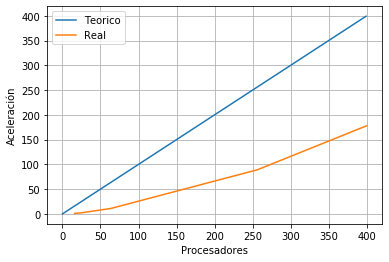

In [27]:
graficar(datos_relativos["Proc"],datos_relativos["Aceleración"],"Procesadores","Aceleración",True)

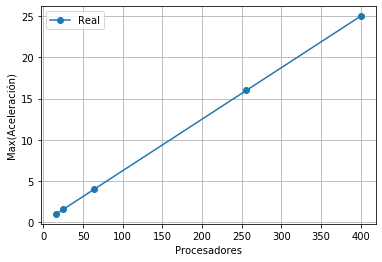

In [59]:
graficar(datos_relativos["Proc"],datos_relativos["Max(Aceleración)"],"Procesadores","Max(Aceleración)")

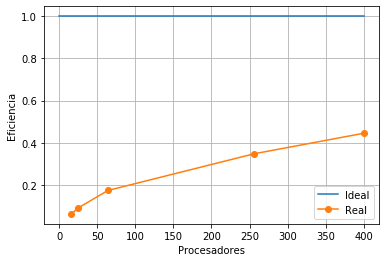

In [60]:
plt.plot([0,np.max(datos.Proc)],[1,1],label="Ideal")
graficar(datos_relativos["Proc"],datos_relativos["Eficiencia"],"Procesadores","Eficiencia")

4. *Generar información similar al punto 2, sustituyendo el valor atípico por el valor mostrado en la transparencia 9.  Agregar estos datos al dataframe antes creado y realizar los gráficos correspondientes usando Matplotlib.*

In [61]:
datos2 = pd.read_csv("paralelismo2.csv")
datos2

,Proc,Time
0,1,430
1,16,178
2,25,78
3,64,16
4,256,2
5,400,1


In [62]:
datos2["Aceleración"] = datos2["Time"][0] / datos2["Time"]

datos2["Eficiencia"] = datos2["Aceleración"] / datos2["Proc"]

datos2["Costo"] = datos2["Proc"] * datos2["Time"]

datos2

,Proc,Time,Aceleración,Eficiencia,Costo
0,1,430,1.000000,1.000000,430
1,16,178,2.415730,0.150983,2848
2,25,78,5.512821,0.220513,1950
3,64,16,26.875000,0.419922,1024
4,256,2,215.000000,0.839844,512
5,400,1,430.000000,1.075000,400


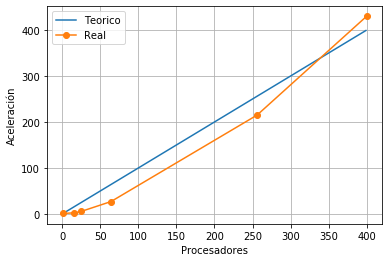

In [64]:
graficar(datos2.Proc, datos2.Aceleración,"Procesadores","Aceleración",True)

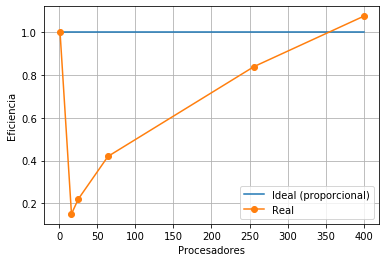

In [67]:
plt.plot([0,np.max(datos2.Proc)],[1,1],label="Ideal (proporcional)")
graficar(datos2.Proc, datos2.Eficiencia,"Procesadores","Eficiencia")

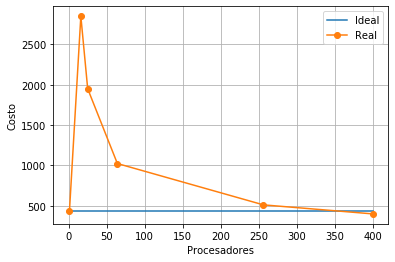

In [68]:
plt.plot([0,np.max(datos2.Proc)],[datos2.Time[0],datos2.Time[0]],label="Ideal")
graficar(datos2.Proc, datos2.Costo,"Procesadores","Costo")

5. *Contar la historia del análisis de esta información usando gráficos que resalten lo realizado en los incisos 2 y 3.*

Se encontró que el dato atípico puede hacer bastante ruido a la hora de hacer una gráfica

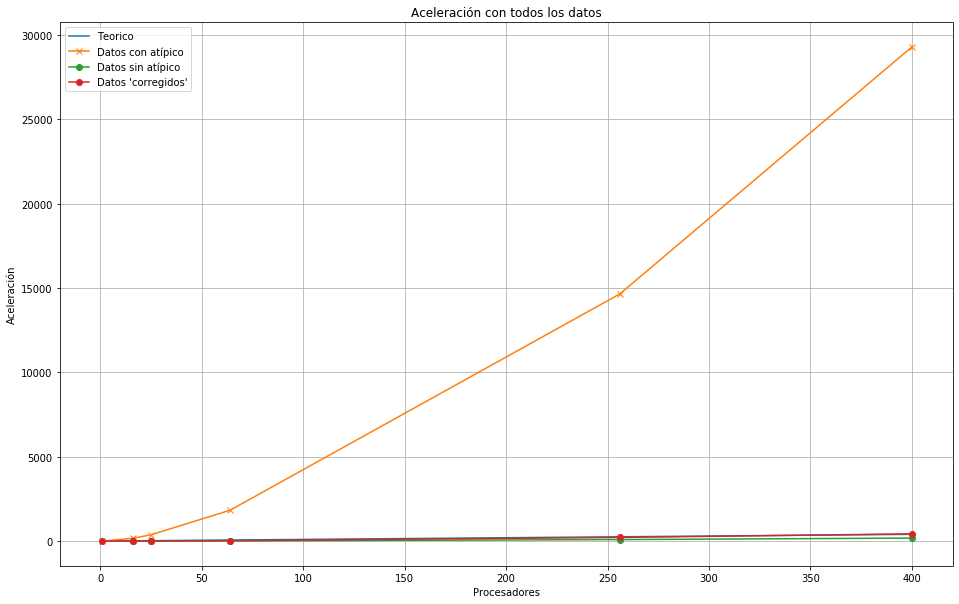

In [70]:
plt.figure(figsize=(16,10))

lineal = np.arange(0,np.max(datos.Proc))
plt.plot(lineal,lineal, label = "Teorico")

plt.plot(datos.Proc, datos.Aceleración, label="Datos con atípico", marker='x')
plt.plot(datos_relativos.Proc, datos_relativos.Aceleración, label ="Datos sin atípico",marker='o')
plt.plot(datos2.Proc, datos2.Aceleración, label = "Datos 'corregidos'",marker='o')

plt.legend()
plt.title("Aceleración con todos los datos")
plt.xlabel("Procesadores")
plt.ylabel("Aceleración")
plt.grid(True)
plt.show()

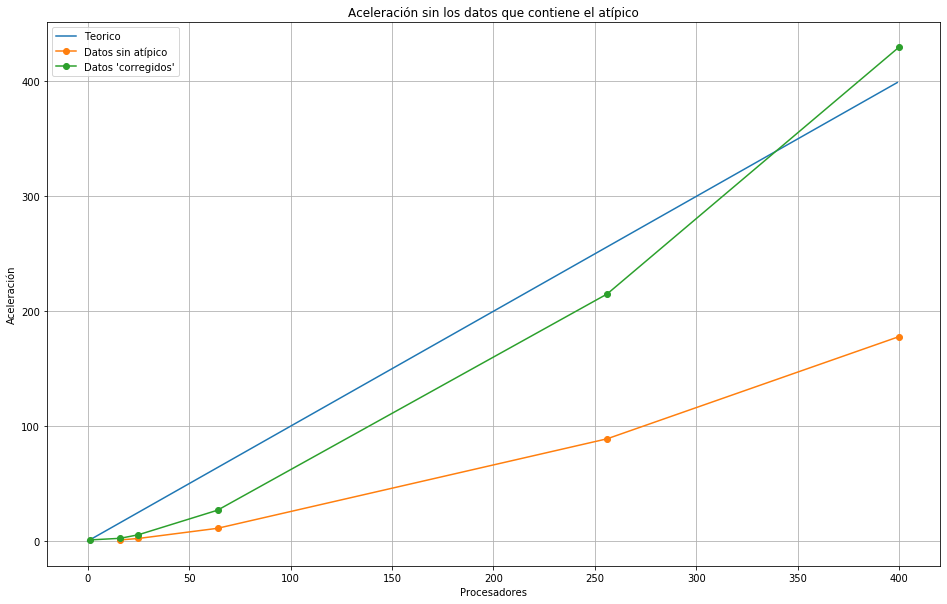

In [71]:
plt.figure(figsize=(16,10))
lineal = np.arange(0,np.max(datos.Proc))
plt.plot(lineal,lineal, label = "Teorico")

plt.plot(datos_relativos.Proc, datos_relativos.Aceleración, label ="Datos sin atípico", marker='o')
plt.plot(datos2.Proc, datos2.Aceleración, label = "Datos 'corregidos'",marker='o')

plt.legend()
plt.title("Aceleración sin los datos que contiene el atípico")
plt.xlabel("Procesadores")
plt.ylabel("Aceleración")
plt.grid(True)
plt.show()

Para un mejor entendimiento del costo absoluto y de la eficiencia absoluta, se debe omitir el primer registro, ya que se entiende que el algoritmo es óptimo cuando es secuencial

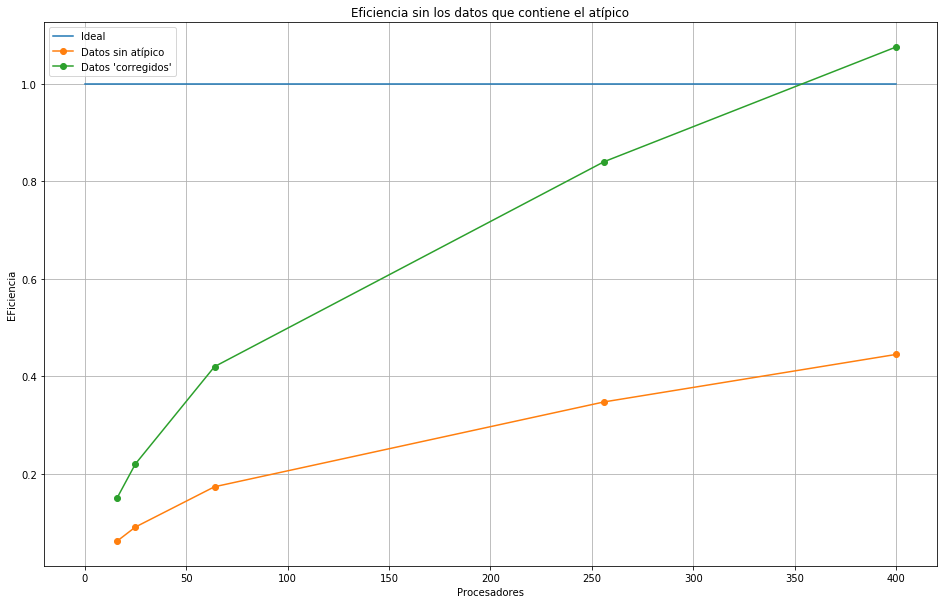

In [72]:
plt.figure(figsize=(16,10))
plt.plot([0,np.max(datos.Proc)],[1,1],label="Ideal")

plt.plot(datos_relativos.Proc, datos_relativos.Eficiencia, label ="Datos sin atípico", marker='o')
plt.plot(datos2.Proc[1:], datos2.Eficiencia[1:], label = "Datos 'corregidos'", marker='o') # omitimos primer renglon

plt.legend()
plt.title("Eficiencia sin los datos que contiene el atípico")
plt.xlabel("Procesadores")
plt.ylabel("EFiciencia")
plt.grid(True)
plt.show()

De igual manera, parece ser que los datos en donde se corrigió el primer tiempo, siguen siendo algo sospechosos ya que la eficiencia parece superar la ideal.